In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:

df_train = pd.read_csv("C:\\Users\\NANDAKISHORE BOINI\\OneDrive\\Desktop\\Titanic_train.csv")
df_test = pd.read_csv("C:\\Users\\NANDAKISHORE BOINI\\OneDrive\\Desktop\\Titanic_test.csv")
data = pd.concat([df_train, df_test], axis=0)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [21]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [22]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

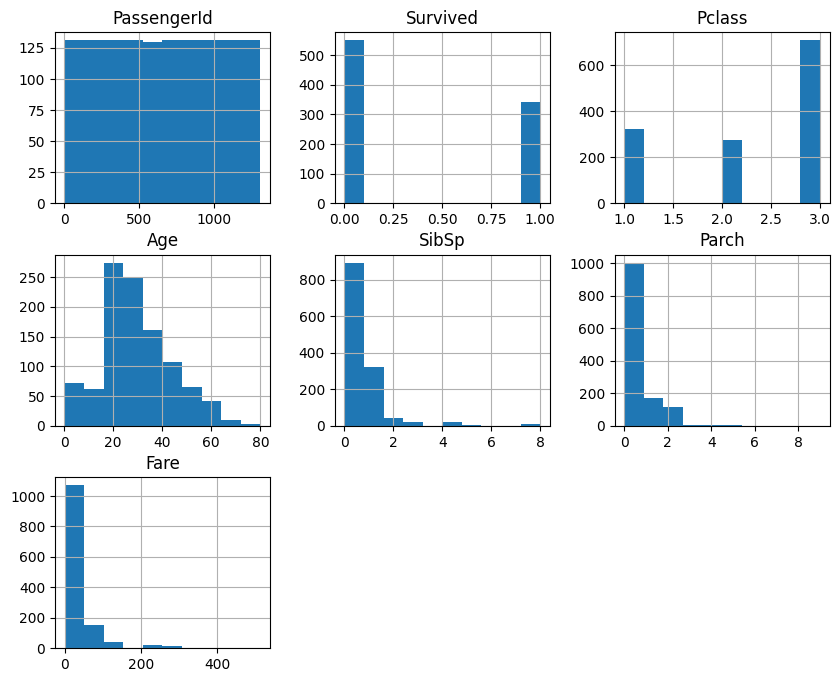

In [23]:
# Visualize data distributions
data.hist(figsize=(10, 8))
plt.show()

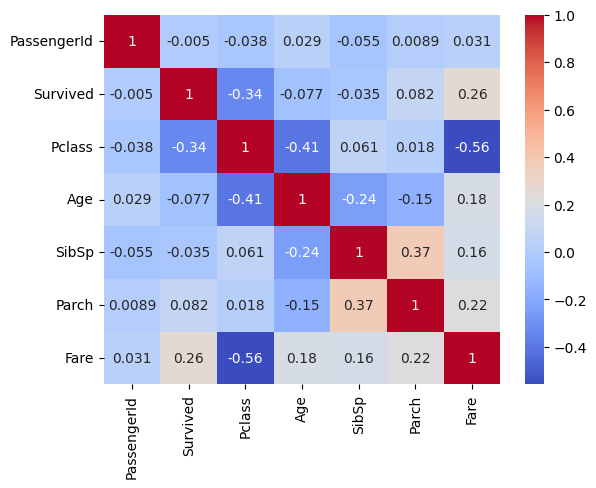

In [24]:
# Correlation matrix
# Include only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [25]:
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [27]:
# Summary statistics for categorical features
print(data.describe(include=['object']))

                        Name   Sex    Ticket        Cabin Embarked
count                   1309  1309      1309          295     1307
unique                  1307     2       929          186        3
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S
freq                       2   843        11            6      914


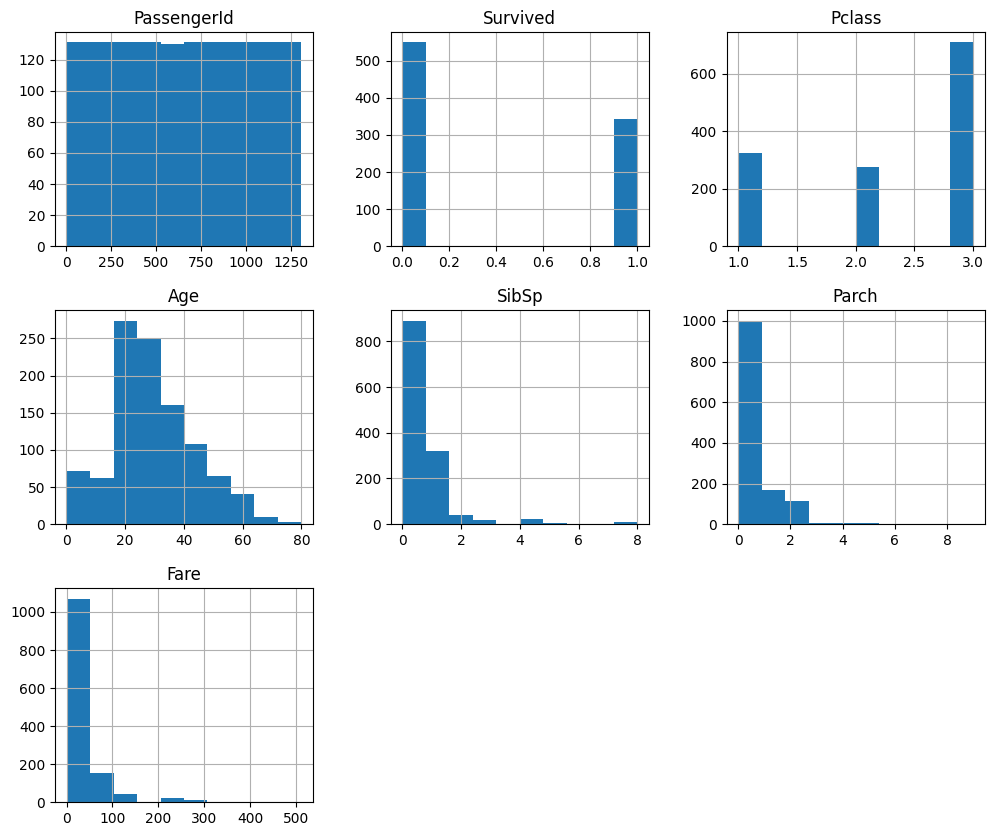

In [28]:
import matplotlib.pyplot as plt

# Histograms for numerical features
data.hist(figsize=(12, 10))
plt.show()

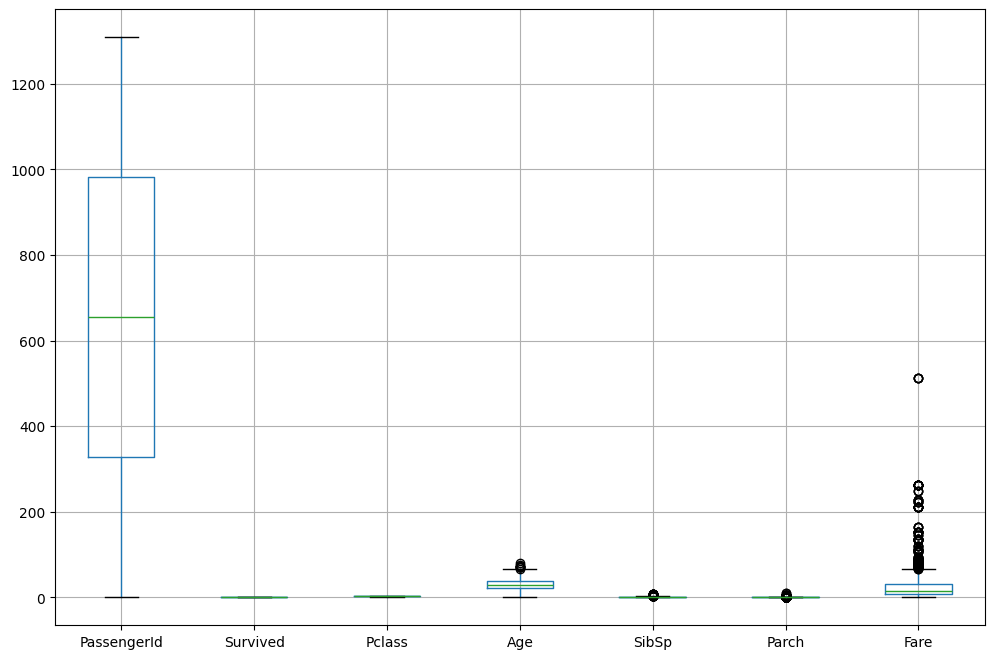

In [29]:
# Box plots for numerical features
data.boxplot(figsize=(12, 8))
plt.show()


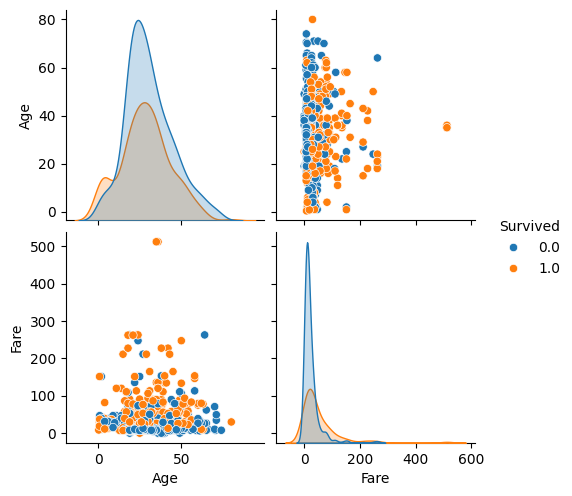

In [30]:
# Pair plot for selected features
sns.pairplot(data[['Age', 'Fare', 'Survived']].dropna(), hue='Survived')
plt.show()

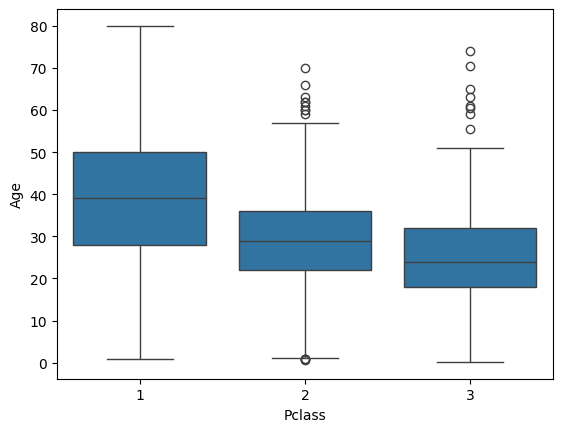

In [31]:
# Reset the index of the DataFrame to ensure unique index values
data = data.reset_index(drop=True)

# Now you should be able to create the boxplot without the error
sns.boxplot(x='Pclass', y='Age', data=data)
plt.show()

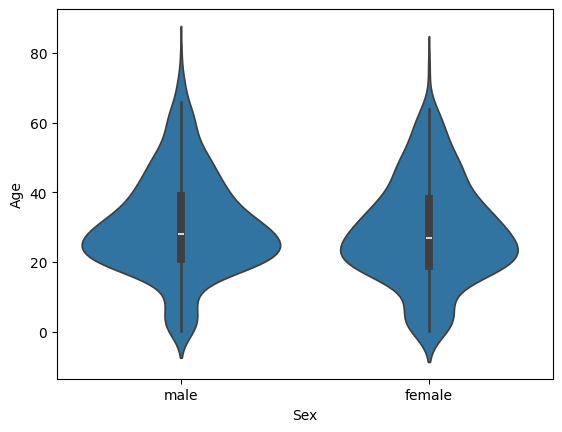

In [32]:
# Violin plot for a specific feature grouped by another feature
sns.violinplot(x='Sex', y='Age', data=data)
plt.show()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Age_Group
Child          0.503597
Young Adult    0.355556
Adult          0.423237
Senior         0.343750
Name: Survived, dtype: float64
Fare_Group
Low          0.205607
Medium       0.424581
High         0.416667
Very High    0.681250
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


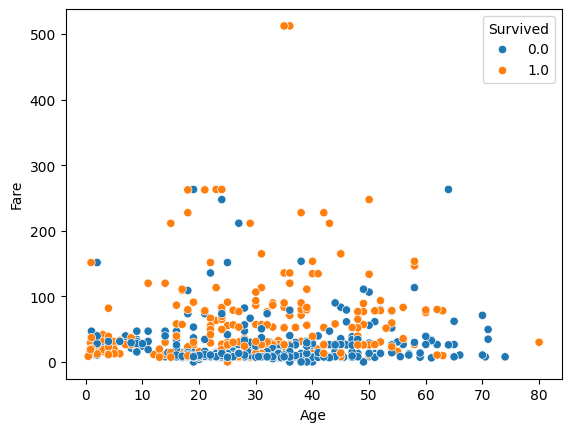

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
# Analyze patterns and correlations

# 1. Survival Rate by Passenger Class:
print(data.groupby('Pclass')['Survived'].mean())
#  Observe if higher passenger class had a higher survival rate.

# 2. Survival Rate by Sex:
print(data.groupby('Sex')['Survived'].mean())
#  Observe if one gender had a higher survival rate.

# 3. Age and Survival:
#  Create age groups and analyze survival rate within each group.
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
print(data.groupby('Age_Group')['Survived'].mean())
#  Observe if age played a role in survival.

# 4. Fare and Survival:
#  Create fare groups and analyze survival rate within each group.
data['Fare_Group'] = pd.cut(data['Fare'], bins=[0, 10, 20, 50, 1000], labels=['Low', 'Medium', 'High', 'Very High'])
print(data.groupby('Fare_Group')['Survived'].mean())
#  Observe if fare had a correlation with survival.

# 5. Embarked and Survival:
print(data.groupby('Embarked')['Survived'].mean())
#  Observe if the port of embarkation influenced survival.

# 6.  Visualize relationships:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.show()
#  Observe if there are any visible patterns in the scatter plot related to age, fare, and survival.


In [34]:
# Fill missing Age values with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing Embarked values with the most frequent value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# For 'Cabin', it might be better to create a new feature indicating if the cabin was known or not
data['Cabin_Known'] = data['Cabin'].notnull()


In [35]:
import pandas as pd
# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Pclass'])


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = ['Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']
target = 'Survived'

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop rows with missing values from both X_train and y_train
train_data = pd.concat([X_train, y_train], axis=1) # Concatenate X_train and y_train
train_data.dropna(inplace=True) # Drop rows with missing values from the concatenated DataFrame
X_train = train_data[features] # Extract X_train
y_train = train_data[target] # Extract y_train

# Drop rows with missing values from both X_test and y_test
test_data = pd.concat([X_test, y_test], axis=1)
test_data.dropna(inplace=True)
X_test = test_data[features]
y_test = test_data[target]

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7848837209302325
Confusion Matrix:
 [[84 15]
 [22 51]]
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82        99
         1.0       0.77      0.70      0.73        73

    accuracy                           0.78       172
   macro avg       0.78      0.77      0.78       172
weighted avg       0.78      0.78      0.78       172



In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Removed extra indent
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#model = LogisticRegression(max_iter=1000)

#model = LogisticRegression(solver='liblinear')

LogisticRegression()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC score: {roc_auc}")


Accuracy: 0.7848837209302325
Precision: 0.7727272727272727
Recall: 0.6986301369863014
F1-score: 0.7338129496402878
ROC-AUC score: 0.8330565933305658


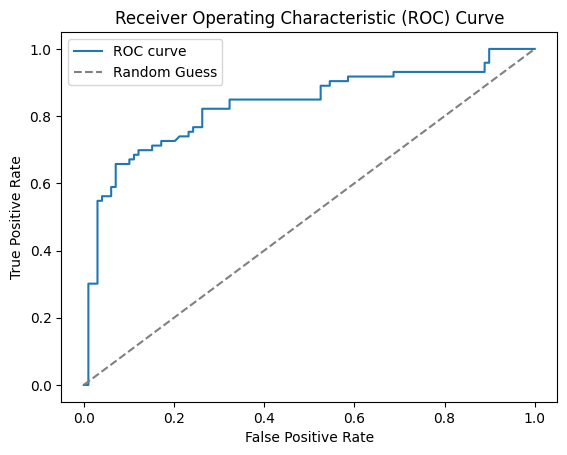

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [40]:
import pandas as pd
# Get the coefficients of the model
coefficients = model.coef_[0]

# Create a DataFrame to display the coefficients with feature names
feature_names = features
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the coefficients
print(coef_df)


      Feature  Coefficient  Abs_Coefficient
2  Sex_female     0.617665         0.617665
3    Sex_male    -0.617665         0.617665
9    Pclass_3    -0.538091         0.538091
7    Pclass_1     0.512472         0.512472
0         Age    -0.377218         0.377218
6  Embarked_S    -0.119148         0.119148
8    Pclass_2     0.116516         0.116516
4  Embarked_C     0.095486         0.095486
5  Embarked_Q     0.056828         0.056828
1        Fare     0.024019         0.024019


In [41]:
import pandas as pd
# Get the coefficients of the model
coefficients = model.coef_[0]

# Create a DataFrame to display the coefficients with feature names
feature_names = features
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the coefficients
print(coef_df)



      Feature  Coefficient  Abs_Coefficient
2  Sex_female     0.617665         0.617665
3    Sex_male    -0.617665         0.617665
9    Pclass_3    -0.538091         0.538091
7    Pclass_1     0.512472         0.512472
0         Age    -0.377218         0.377218
6  Embarked_S    -0.119148         0.119148
8    Pclass_2     0.116516         0.116516
4  Embarked_C     0.095486         0.095486
5  Embarked_Q     0.056828         0.056828
1        Fare     0.024019         0.024019


In [42]:
#!pip install streamlit

import streamlit as st
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)

# Function to make predictions
def predict_survival(features):
  # Scale the input features using the same scaler used during training
  scaled_features = scaler.transform([features])
  prediction = model.predict(scaled_features)[0]
  probability = model.predict_proba(scaled_features)[0][1]
  return prediction, probability

# Streamlit app
st.title("Titanic Survival Prediction")

# Get user inputs
age = st.number_input("Age", min_value=0, max_value=100, value=25)
fare = st.number_input("Fare", min_value=0, max_value=1000, value=50)
sex_female = st.selectbox("Sex", ["Female", "Male"]) == "Female"
sex_male = not sex_female
embarked_c = st.selectbox("Embarked", ["Cherbourg", "Queenstown", "Southampton"], key="embarked_c") == "Cherbourg"
embarked_q = st.selectbox("Embarked", ["Cherbourg", "Queenstown", "Southampton"], key="embarked_q") == "Queenstown"
embarked_s = not embarked_c and not embarked_q
pclass = st.selectbox("Pclass", [1, 2, 3])
pclass_1 = pclass == 1
pclass_2 = pclass == 2
pclass_3 = pclass == 3

# Create a feature vector
features = [age, fare, int(sex_female), int(sex_male), int(embarked_c), int(embarked_q), int(embarked_s), int(pclass_1), int(pclass_2), int(pclass_3)]

# Make prediction
if st.button("Predict"):
  prediction, probability = predict_survival(features)
  if prediction == 1:
    st.success(f"Passenger is likely to survive with a probability of {probability:.2f}")
  else:
    st.error(f"Passenger is likely to not survive with a probability of {1 - probability:.2f}")


2024-10-03 18:44:28.045 
  command:

    streamlit run C:\Users\NANDAKISHORE BOINI\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [43]:

# 1. What is the difference between precision and recall?
# Answer:
# Precision measures the accuracy of positive predictions made by the model.
# It answers the question: "Of all the instances predicted as positive, how many were actually positive?"
#
# Recall measures the model's ability to identify all the actual positive instances.
# It answers the question: "Of all the actual positive instances, how many were correctly predicted as positive?"
#
# In simpler terms:
# - Precision focuses on minimizing false positives (predicting positive when it's actually negative).
# - Recall focuses on minimizing false negatives (predicting negative when it's actually positive).
#
# There is often a trade-off between precision and recall. Increasing one may decrease the other.
# The choice of which metric is more important depends on the specific application.
# For example, in medical diagnosis, recall (identifying all positive cases) might be more crucial than precision.
# In spam detection, precision (ensuring only actual spam is marked as spam) might be more important.


# 2. What is cross-validation, and why is it important in binary classification?
# Answer:
# Cross-validation is a technique used to evaluate the performance of a model on unseen data.
# It involves splitting the available data into multiple folds (e.g., 5 or 10).
# The model is then trained on a subset of the data (e.g., 4 folds) and tested on the remaining fold.
# This process is repeated multiple times, with each fold serving as the test set once.
# The average performance across all folds is then used as the overall evaluation of the model.
#
# In binary classification, cross-validation is crucial for several reasons:
# - It helps to avoid overfitting: Overfitting occurs when the model performs well on the training data but poorly on new, unseen data.
#   By training and testing on different subsets of the data, cross-validation provides a more realistic estimate of the model's performance on unseen data.
# - It provides a more robust estimate of model performance: Using only a single train-test split might lead to a biased estimate of the model's performance, especially if the data is not evenly distributed.
#   Cross-validation averages performance over multiple splits, reducing the risk of a biased estimate.
# - It helps to tune model hyperparameters: Cross-validation can be used to compare different model configurations and select the one with the best performance.
#   This is done by training the model with different hyperparameter values and evaluating the performance using cross-validation.


